Original Data:
     Store      Jan      Feb      Mar      Apr
0  Store_A  15000.0  18000.0      NaN  17000.0
1  Store_B  12000.0  12500.0  13000.0      NaN
2  Store_C  14000.0  13800.0  14200.0  14500.0
3  Store_D  13500.0      NaN  13700.0  13900.0
4  Store_E      NaN  11000.0  12000.0  11800.0
5  Store_B  12000.0  12500.0  13000.0      NaN
6  Store_A  15000.0  18000.0      NaN  17000.0
7  Store_C      NaN  13800.0  14200.0  14500.0
8  Store_D  13500.0  13400.0  13700.0      NaN
9  Store_E  11500.0      NaN  12000.0  11800.0

Cleaned Data:
     Store      Jan      Feb           Mar           Apr
0  Store_A  15000.0  18000.0  13257.142857  17000.000000
1  Store_B  12000.0  12500.0  13000.000000  13916.666667
2  Store_C  14000.0  13800.0  14200.000000  14500.000000
3  Store_D  13500.0  13750.0  13700.000000  13900.000000
4  Store_E  13250.0  11000.0  12000.000000  11800.000000
7  Store_C  13250.0  13800.0  14200.000000  14500.000000
8  Store_D  13500.0  13400.0  13700.000000  13916.6666

<Figure size 1200x600 with 0 Axes>

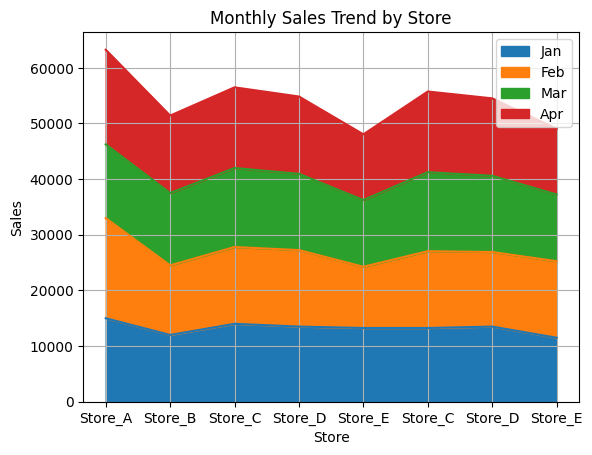

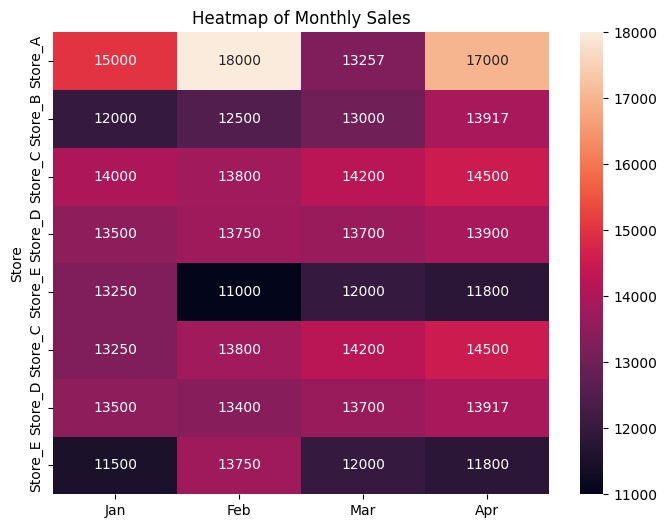

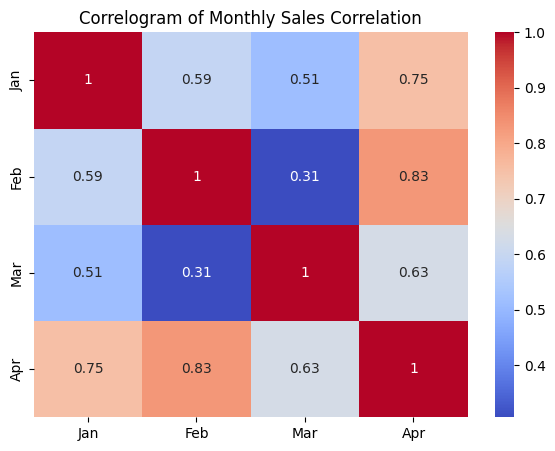

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1. Load Dataset
# ===============================
df = pd.read_csv("/content/store_sales.csv")

print("Original Data:")
print(df)

# ===============================
# 2. Remove Duplicates
# ===============================
df_clean = df.drop_duplicates()

# ===============================
# 3. Replace Missing Values (Mean Imputation)
# ===============================
df_filled = df_clean.copy()
df_filled[['Jan','Feb','Mar','Apr']] = df_filled[['Jan','Feb','Mar','Apr']].fillna(
    df_filled[['Jan','Feb','Mar','Apr']].mean()
)

print("\nCleaned Data:")
print(df_filled)

# ===============================
# 4. Area Chart (Monthly Trend)
# ===============================
df_plot = df_filled.set_index("Store")

plt.figure(figsize=(12,6))
df_plot.plot(kind='area')
plt.title("Monthly Sales Trend by Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# ===============================
# 5. Heatmap (Sales Correlation Between Stores)
# ===============================
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_plot, annot=True, fmt=".0f")
plt.title("Heatmap of Monthly Sales")
plt.show()

# ===============================
# 6. Correlogram (Correlation Across Months)
# ===============================
corr = df_plot.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlogram of Monthly Sales Correlation")
plt.show()
